In [177]:
import pandas as pd
import numpy as np

In [178]:
df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') #nothing to change but NO PLATE INFO
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')

## df_GrowthCurve_allData

In [243]:
df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_GrowthCurve_allData = df_GrowthCurve_allData.drop(columns=['row','column','endOD',
       'maxOD', 'maxOD.t', 'expAcc', 'lag', 'statAcc', 'stat', 'maxR',
       'maxR.t', 'minR', 'minR.t', 'Function', 'Structure_class_1',
       'Structure_class_2', 'Target.1']) 

df_GrowthCurve_allData = df_GrowthCurve_allData.rename(columns={'ProductName': 'Compound','Plate':'Plate_ID', 'MIC':'Control_Label'})

df_GrowthCurve_allData["Control_Label"] = df_GrowthCurve_allData["Control_Label"].apply(
       lambda x: 1 if x in ['Cipro', 'Fosfo'] else (-1 if x == 'DMSO' else 0)
)

df_GrowthCurve_allData

,Well,Plate_ID,Concentration,Compound,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Control_Label,Smiles
0,A01,546,0.2,DMSO,0.0,0.281996,0.570499,0.763557,0.872017,0.965293,1.041215,-1,NaN
1,A02,546,0.2,DMSO,0.0,0.288503,0.613883,0.778742,0.889371,0.978308,1.062907,-1,NaN
2,A03,546,0.2,Polyoxyethylene stearate,0.0,0.286334,0.587852,0.765727,0.889371,0.982646,1.043384,0,O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10]
3,A04,546,0.2,Lefamulin (acetate),0.0,0.262473,0.559653,0.737527,0.863341,0.950108,1.008677,0,CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...
4,A05,546,0.2,Cefodizime (sodium),0.0,0.275488,0.924078,0.676790,0.685466,0.668113,0.672451,0,O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18427,P20,S10,7.9,DMSO,0.0,0.187970,0.511278,0.736842,0.857143,0.924812,0.989975,-1,NaN
18428,P21,S10,7.9,DMSO,0.0,0.185464,0.491228,0.736842,0.867168,0.937343,1.002506,-1,NaN
18429,P22,S10,7.9,DMSO,0.0,0.187970,0.506266,0.741855,0.874687,0.942356,1.012531,-1,NaN
18430,P23,S10,7.9,DMSO,0.0,0.197995,0.523810,0.761905,0.877193,0.932331,0.997494,-1,NaN


## df_Enamine_t6_t12_wells/controls

In [244]:
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')
df_Enamine_t6_t12_controls = df_Enamine_t6_t12_controls.drop(columns=['Unnamed: 0'], errors='ignore')


In [245]:
df_Enamine_t6_t12_controls

,Well,Replicate,Compound,t_0,t_6,t_12,Smiles,Plate_ID,Concentration
0,A01,OD_A,DMSO,0.000000,0.584807,1.150336,NaN,1886318-Y12-A081,50
1,A02,OD_A,Ciprofloxacin,0.003213,0.003213,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A081,50
2,A23,OD_A,DMSO,0.000000,0.552675,1.098924,NaN,1886318-Y12-A081,50
3,A24,OD_A,DMSO,0.000000,0.552675,1.111777,NaN,1886318-Y12-A081,50
4,B01,OD_A,DMSO,0.000000,0.607300,1.137483,NaN,1886318-Y12-A081,50
...,...,...,...,...,...,...,...,...,...
12795,O24,OD_C,DMSO,0.000000,0.604127,1.090567,NaN,1886318-Y12-A100,50
12796,P01,OD_C,DMSO,0.000000,0.708738,1.205639,NaN,1886318-Y12-A100,50
12797,P02,OD_C,DMSO,0.000000,0.632895,1.085337,NaN,1886318-Y12-A100,50
12798,P23,OD_C,Ciprofloxacin,0.000000,0.005231,0.002615,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A100,50


In [246]:
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})
df_Enamine_t6_t12_controls=df_Enamine_t6_t12_controls.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})


df_Enamine_t6_t12_wells['Concentration'] = 50
df_Enamine_t6_t12_controls['Concentration'] = 50

df_Enamine_t6_t12_wells['Control_Label'] = 0


df_Enamine_t6_t12_controls['Control_Label'] = df_Enamine_t6_t12_controls["Compound"].apply(
    lambda x: 1 if x == 'Ciprofloxacin' else -1
)
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.drop(columns=['Activity'])


In [247]:
df_Enamine_t6_t12_wells

,Compound,Replicate,Well,t_0,t_6.24,t_12.48,Smiles,Plate_ID,Concentration,Control_Label
0,Z839134902,OD_A,A03,0.0,0.564947,0.962840,FC(F)(F)COC(=O)NC=1C=CC(=NC1)N2CCNC(=O)C2,1886318-Y12-A001,50,0
1,Z965658782,OD_A,B03,0.0,0.692516,1.002325,CC1=CC=C(S1)C=2C=CC(=O)N(CC=3C=CC=C([N+](=O)[O...,1886318-Y12-A001,50,0
2,Z16698707,OD_A,C03,0.0,0.534574,0.950691,CCN1C(SCC(=O)OCC=2C=CC(=CC2)[N+](=O)[O-])=NN=C...,1886318-Y12-A001,50,0
3,Z952434162,OD_A,D03,0.0,0.586209,0.996251,[O-][N+](=O)C=1C=CC(=CC1)C(=O)NC=2C=CC=C(C2)C=...,1886318-Y12-A001,50,0
4,Z558591178,OD_A,E03,0.0,0.574059,0.971952,CS(=O)(=O)NC1CCCN(C1)C(=O)NC2CCN3CCCCC23,1886318-Y12-A001,50,0
...,...,...,...,...,...,...,...,...,...,...
63995,Z3342561431,OD_C,M05,0.0,0.523054,0.920575,CC1(C)CN(CC1CN)C=2N=C(N=C3CCCC32)C=4C=CN=CC4,1886318-Y12-A100,50,0
63996,Z1459426305,OD_C,H15,0.0,0.538745,1.019955,CC(C)CCC1CCCCN1C(=O)C2=CSC(CN)=N2,1886318-Y12-A100,50,0
63997,Z6191966153,OD_C,A05,0.0,0.564898,1.035647,CN1CCOC=2C=CC(=CC12)C(=O)NCC=3C=CC=NC3CN,1886318-Y12-A100,50,0
63998,Z2396635673,OD_C,N17,0.0,0.533515,0.993802,CC1CC(CN1C(=O)NC=2C=C(C)C=C(CN)C2)C=3C=CC(C)=CC3,1886318-Y12-A100,50,0


## df_control_growth_curves

In [248]:
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') 

In [249]:
df_control_growth_curves["Well"] = df_control_growth_curves["Well"].str[0] + df_control_growth_curves["Well"].str[1:].str.zfill(2)

df_control_growth_curves['Control_Label'] = df_control_growth_curves["Compound"].apply(
    lambda x: -1 if x == 'DMSO' else 1
)
df_control_growth_curves["Plate_ID"] = 'unknown'

In [250]:
df_control_growth_curves

,Well,Concentration,Compound,Replicate,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label,Plate_ID
0,C03,50.00,Rifampicin,4,0.003157,0.001579,0.001579,0.001579,0.001579,0.001579,0.003157,CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...,1,unknown
1,C04,0.20,Fosfomycin,1,0.000000,0.137337,0.503571,0.688266,0.926633,1.109750,1.212358,C[C@H]1[C@H](O1)P(=O)(O)O,1,unknown
2,C06,7.90,Ciprofloxacin,4,0.000000,0.012629,0.014207,0.012629,0.011050,0.011050,0.009472,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1,unknown
3,C08,3.13,Ciprofloxacin,5,0.000000,0.029993,0.042622,0.039465,0.036308,0.033150,0.031572,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1,unknown
4,C09,50.00,Trimethoprim,5,0.000000,0.033150,0.137337,0.157859,0.172066,0.154702,0.170488,Nc1nc(N)ncc1Cc(cc2OC)cc(OC)c2OC,1,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,N16,7.90,Ciprofloxacin,2,0.000000,0.009472,0.011050,0.011050,0.009472,0.009472,0.007893,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1,unknown
196,N17,7.90,DMSO,5,0.000000,0.127866,0.451477,0.607758,0.771931,0.838232,1.101857,NaN,-1,unknown
197,N20,3.13,Rifampicin,6,0.000000,0.066301,0.102608,0.101030,0.086823,0.083665,0.061565,CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...,1,unknown
198,N21,50.00,DMSO,2,0.000000,0.126287,0.416748,0.514621,0.606179,0.674058,0.735624,NaN,-1,unknown


## df_Enamine_DR_growthCurves

In [251]:
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')

In [252]:
df_Enamine_DR_growthCurves=df_Enamine_DR_growthCurves.rename(columns={"Plate":"Plate_ID"})
df_Enamine_DR_growthCurves['Control_Label'] = 0

df_Enamine_DR_growthCurves=df_Enamine_DR_growthCurves.drop(columns=['MIC'])

In [253]:
df_Enamine_DR_growthCurves

,Well,Plate_ID,Compound,Concentration,Replicate,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label
0,A03,111-DR1,Z27542156,50.000,D,0.0,0.130220,0.434068,0.625569,0.732809,0.840049,0.947289,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
1,A04,111-DR1,Z27542156,12.500,D,0.0,0.171074,0.518328,0.651102,0.778769,0.901329,1.018783,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
2,A05,111-DR1,Z27542156,3.130,D,0.0,0.181287,0.543862,0.668975,0.801749,0.926863,1.039210,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
3,A06,111-DR1,Z27542156,0.781,D,0.0,0.194054,0.556628,0.679189,0.804302,0.931969,1.039210,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
4,A07,111-DR1,Z27542156,0.200,D,0.0,0.194054,0.571948,0.686849,0.814516,0.939629,1.049423,[O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,P03,111-DR9,Z6204188633,50.000,E,0.0,0.225165,0.501503,0.624320,0.716433,0.790635,0.859720,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1,0
2636,P04,111-DR9,Z6204188633,12.500,E,0.0,0.291691,0.614086,0.734344,0.857161,0.959509,1.056739,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1,0
2637,P05,111-DR9,Z6204188633,3.130,E,0.0,0.281456,0.624320,0.762490,0.890424,1.000448,1.107913,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1,0
2638,P06,111-DR9,Z6204188633,0.781,E,0.0,0.278897,0.647349,0.752255,0.895541,1.013241,1.123265,NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1,0


# Concat them

In [254]:
common_columns = ['Well', 'Plate_ID', 'Concentration', 'Compound', 'Replicate',
                  't_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48',
                'Smiles','Control_Label']


def standardize_columns(df,rip):
    for col in common_columns:
        if col not in df.columns:
            df[col] = pd.NA  # Add missing column with NaNs
    return df[common_columns]  # Select and order columns

df1 = standardize_columns(df_GrowthCurve_allData, "allData")
df2 = standardize_columns(df_control_growth_curves, "controls")
df3 = standardize_columns(df_Enamine_DR_growthCurves, "DR")
df4 = standardize_columns(df_Enamine_t6_t12_wells, "t6t12_wells")
df5 = standardize_columns(df_Enamine_t6_t12_controls,"t6t12_controls")

# Step 2: Concatenate all standardized DataFrames
df_concat = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Optional: inspect the result
print(df_concat.shape)
print(df_concat.columns)

(98072, 14)
Index(['Well', 'Plate_ID', 'Concentration', 'Compound', 'Replicate', 't_0',
       't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48', 'Smiles',
       'Control_Label'],
      dtype='object')


/tmp/ipykernel_2421258/2271599281.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_concat = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


In [255]:
df_concat

,Well,Plate_ID,Concentration,Compound,Replicate,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label
0,A01,546,0.2,DMSO,NaN,0.0,0.281996,0.570499,0.763557,0.872017,0.965293,1.041215,NaN,-1
1,A02,546,0.2,DMSO,NaN,0.0,0.288503,0.613883,0.778742,0.889371,0.978308,1.062907,NaN,-1
2,A03,546,0.2,Polyoxyethylene stearate,NaN,0.0,0.286334,0.587852,0.765727,0.889371,0.982646,1.043384,O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10],0
3,A04,546,0.2,Lefamulin (acetate),NaN,0.0,0.262473,0.559653,0.737527,0.863341,0.950108,1.008677,CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...,0
4,A05,546,0.2,Cefodizime (sodium),NaN,0.0,0.275488,0.924078,0.676790,0.685466,0.668113,0.672451,O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98067,O24,1886318-Y12-A100,50.0,DMSO,OD_C,0.0,NaN,NaN,0.604127,NaN,NaN,1.090567,NaN,-1
98068,P01,1886318-Y12-A100,50.0,DMSO,OD_C,0.0,NaN,NaN,0.708738,NaN,NaN,1.205639,NaN,-1
98069,P02,1886318-Y12-A100,50.0,DMSO,OD_C,0.0,NaN,NaN,0.632895,NaN,NaN,1.085337,NaN,-1
98070,P23,1886318-Y12-A100,50.0,Ciprofloxacin,OD_C,0.0,NaN,NaN,0.005231,NaN,NaN,0.002615,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1


# Row and Column Batch effect

In [256]:
df_concat.columns

Index(['Well', 'Plate_ID', 'Concentration', 'Compound', 'Replicate', 't_0',
       't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48', 'Smiles',
       'Control_Label'],
      dtype='object')

In [262]:
import pandas as pd
from statsmodels import robust

# Step 1: Reshape to long format
df_long = df_concat.melt(
    id_vars=['Well', 'Concentration', 'Compound', 'Plate_ID', 'Replicate', 'Smiles', 'Control_Label'],
    value_vars=['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48'],
    var_name='Timepoint',
    value_name='OD'
)
df_long

# Step 2: Group and apply robust normalization (subtract median, divide by MAD)
def robust_standardize(group):
    median = group['OD'].median()
    mad = robust.mad(group['OD'])
    group['OD_corrected'] = (group['OD'] - median)#if mad != 0 else group['OD'] - median
    return group

df_long = df_long.groupby(['Well', 'Concentration', 'Timepoint'], group_keys=False).apply(robust_standardize)

# Step 3: Pivot back to wide format
df_corrected = df_long.pivot_table(
    index=['Well', 'Concentration', 'Compound', 'Plate_ID', 'Replicate', 'Smiles', 'Control_Label'],
    columns='Timepoint',
    values='OD_corrected'
).reset_index()

# Optional: Reorder time columns to match original format
t_columns = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
df_corrected = df_corrected[['Well', 'Plate_ID', 'Concentration', 'Compound', 'Replicate'] + t_columns + ['Smiles', 'Control_Label']]


/tmp/ipykernel_2421258/2170960653.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_long = df_long.groupby(['Well', 'Concentration', 'Timepoint'], group_keys=False).apply(robust_standardize)


In [263]:
df_corrected

Timepoint,Well,Plate_ID,Concentration,Compound,Replicate,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label
0,A02,1886318-Y12-A001,50.0,Ciprofloxacin,OD_A,-0.000224,NaN,NaN,-0.002699,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
1,A02,1886318-Y12-A001,50.0,Ciprofloxacin,OD_C,0.005412,NaN,NaN,0.002937,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
2,A02,1886318-Y12-A002,50.0,Ciprofloxacin,OD_A,-0.000112,NaN,NaN,-0.005736,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
3,A02,1886318-Y12-A002,50.0,Ciprofloxacin,OD_C,0.005364,NaN,NaN,0.002889,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
4,A02,1886318-Y12-A003,50.0,Ciprofloxacin,OD_A,0.006077,NaN,NaN,0.000489,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69998,P23,1886318-Y12-A098,50.0,Ciprofloxacin,OD_C,-0.002875,NaN,NaN,-0.003166,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
69999,P23,1886318-Y12-A099,50.0,Ciprofloxacin,OD_A,0.003452,NaN,NaN,0.003689,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
70000,P23,1886318-Y12-A099,50.0,Ciprofloxacin,OD_C,-0.002875,NaN,NaN,0.002021,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
70001,P23,1886318-Y12-A100,50.0,Ciprofloxacin,OD_A,0.009880,NaN,NaN,0.006954,NaN,NaN,0.000000,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1


# Median of Plate Negative control batch effect

In [204]:
df_concat.columns

Index(['Well', 'Plate_ID', 'Concentration', 'Compound', 'Replicate', 't_0',
       't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48', 'Smiles',
       'Control_Label'],
      dtype='object')

In [209]:
# Step 1: Filter to only DMSO rows
df_dmso = df_concat[df_concat["Compound"] == "DMSO"]

# Step 2: Melt the timepoint columns into long format
df_dmso_long = df_dmso.melt(
    id_vars=['Plate_ID'],
    value_vars=['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48'],
    var_name='Timepoint',
    value_name='OD'
)

# Step 3: Drop missing OD values
df_dmso_long = df_dmso_long.dropna(subset=['OD'])

df_dmso_long

,Plate_ID,Timepoint,OD
0,546,t_0,0.000000
1,546,t_0,0.000000
2,546,t_0,0.000000
3,546,t_0,0.000000
4,546,t_0,0.000000
...,...,...,...
110406,1886318-Y12-A100,t_12.48,1.048723
110407,1886318-Y12-A100,t_12.48,1.090567
110408,1886318-Y12-A100,t_12.48,1.205639
110409,1886318-Y12-A100,t_12.48,1.085337


In [210]:
# Step 4: Group by Plate_ID and compute median OD
dmso_median_by_plate = df_dmso_long.groupby('Plate_ID')['OD'].median().to_dict()

pd.to_pickle(dmso_median_by_plate, "dmso_median_by_plate.pkl")

In [211]:
dmso_median_by_plate

{'1886318-Y12-A001': 0.6332874566940345,
 '1886318-Y12-A002': 0.6692364471418025,
 '1886318-Y12-A003': 0.661032863849765,
 '1886318-Y12-A004': 0.669745191189661,
 '1886318-Y12-A005': 0.6752520596020579,
 '1886318-Y12-A006': 0.680753724301604,
 '1886318-Y12-A007': 0.680399896280504,
 '1886318-Y12-A008': 0.691219068112224,
 '1886318-Y12-A009': 0.7060899330926145,
 '1886318-Y12-A010': 0.68239290432157,
 '1886318-Y12-A011': 0.654613079863622,
 '1886318-Y12-A012': 0.669480638649293,
 '1886318-Y12-A013': 0.668475672632415,
 '1886318-Y12-A014': 0.656424586795169,
 '1886318-Y12-A015': 0.6587696038588124,
 '1886318-Y12-A016': 0.6589358799454295,
 '1886318-Y12-A017': 0.672962984689388,
 '1886318-Y12-A018': 0.662520235153787,
 '1886318-Y12-A019': 0.657118786857624,
 '1886318-Y12-A020': 0.658835316217909,
 '1886318-Y12-A021': 0.665473326475183,
 '1886318-Y12-A022': 0.672897196261682,
 '1886318-Y12-A023': 0.6723972913509035,
 '1886318-Y12-A024': 0.662096706688247,
 '1886318-Y12-A025': 0.65748904724

# Make B, dataset normalized by expected well batch effect

## Correct batch effect

In [212]:

t_columns = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']

def subtract_well_median(df, median_dict):
    df = df.copy()
    for col in t_columns:
        df[col] = df.apply(lambda row: row[col] - median_dict.get(row['Well'], pd.NA), axis=1)
    return df

df_GrowthCurve_allData = subtract_well_median(df_GrowthCurve_allData, well_medians_dict)
df_control_growth_curves = subtract_well_median(df_control_growth_curves, well_medians_dict)
df_Enamine_DR_growthCurves = subtract_well_median(df_Enamine_DR_growthCurves, well_medians_dict)
df_Enamine_t6_t12_wells = subtract_well_median(df_Enamine_t6_t12_wells, well_medians_dict)
df_Enamine_t6_t12_controls = subtract_well_median(df_Enamine_t6_t12_controls, well_medians_dict)


## Make Dataframe

In [218]:
#Nothing to fix for df_GrowthCurve_allData
df_GrowthCurve_allData

,Well,Plate_ID,Concentration,Compound,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Control_Label,Smiles,Replicate
0,A01,546,0.2,DMSO,-0.698792,-0.416797,-0.128293,0.064765,0.173225,0.266501,0.342423,-1,NaN,<NA>
1,A02,546,0.2,DMSO,-0.005489,0.283014,0.608394,0.773253,0.883882,0.972819,1.057418,-1,NaN,<NA>
2,A03,546,0.2,Polyoxyethylene stearate,-0.640199,-0.353864,-0.052346,0.125528,0.249172,0.342448,0.403185,0,O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10],<NA>
3,A04,546,0.2,Lefamulin (acetate),-0.654459,-0.391986,-0.094806,0.083068,0.208881,0.295649,0.354218,0,CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...,<NA>
4,A05,546,0.2,Cefodizime (sodium),-0.642690,-0.367202,0.281388,0.034100,0.042777,0.025423,0.029762,0,O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18427,P20,S10,7.9,DMSO,-0.666787,-0.478817,-0.155509,0.070055,0.190356,0.258025,0.323188,-1,NaN,<NA>
18428,P21,S10,7.9,DMSO,-0.666457,-0.480993,-0.175228,0.070386,0.200711,0.270887,0.336050,-1,NaN,<NA>
18429,P22,S10,7.9,DMSO,-0.679006,-0.491036,-0.172740,0.062849,0.195681,0.263350,0.333526,-1,NaN,<NA>
18430,P23,S10,7.9,DMSO,-0.005656,0.192339,0.518153,0.756249,0.871537,0.926675,0.991838,-1,NaN,<NA>


In [223]:
df_control_growth_curves = (
    df_control_growth_curves
    .groupby(['Compound','Concentration'], as_index=False)
    .agg({
        'Well': 'first',
        'Plate_ID':'first',
        't_0': 'mean',
        't_2.08': 'mean',
        't_4.16': 'mean',
        't_6.24': 'mean',
        't_8.32': 'mean',
        't_10.4': 'mean',
        't_12.48': 'mean',
        'Smiles': 'first',
        'Control_Label':'first',
     
        
    })
)
df_control_growth_curves

,Compound,Concentration,Well,Plate_ID,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label
0,Ciprofloxacin,0.200,J06,unknown,-0.622645,-0.538716,-0.453998,-0.445053,-0.463733,-0.478730,-0.495568,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
1,Ciprofloxacin,0.781,D21,unknown,-0.623661,-0.571830,-0.525788,-0.517106,-0.518684,-0.523420,-0.530524,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
2,Ciprofloxacin,1.200,D06,unknown,-0.621462,-0.580156,-0.548847,-0.548321,-0.552004,-0.555951,-0.559371,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
3,Ciprofloxacin,3.130,C08,unknown,-0.623781,-0.595630,-0.585369,-0.588526,-0.591420,-0.593525,-0.595893,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
4,Ciprofloxacin,7.900,C06,unknown,-0.629510,-0.619512,-0.617670,-0.618196,-0.619512,-0.620301,-0.621617,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
5,Ciprofloxacin,12.500,E19,unknown,-0.608879,-0.604933,-0.604933,-0.605722,-0.605985,-0.606248,-0.607301,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
6,Ciprofloxacin,50.000,D04,unknown,-0.628081,-0.628081,-0.628081,-0.628081,-0.629028,-0.629028,-0.629660,C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1
7,DMSO,0.200,F16,unknown,-0.620772,-0.496853,-0.184555,-0.049322,0.080385,0.220354,0.338485,None,-1
8,DMSO,0.781,H18,unknown,-0.618229,-0.491310,-0.177171,-0.070142,0.047305,0.170120,0.262625,None,-1
9,DMSO,1.200,C19,unknown,-0.634731,-0.516968,-0.225560,-0.083803,0.027961,0.154880,0.281483,None,-1


In [226]:
df_Enamine_DR_growthCurves = (
    df_Enamine_DR_growthCurves
    .groupby(['Compound','Concentration'], as_index=False)
    .agg({
        'Well': 'first', #this is a shortcut becuase the replicates are in different wells
        'Plate_ID': 'first', 
        't_0': 'mean',
        't_2.08': 'mean',
        't_4.16': 'mean',
        't_6.24': 'mean',
        't_8.32': 'mean',
        't_10.4': 'mean',
        't_12.48': 'mean',
        'Smiles': 'first',
        'Control_Label': 'first' #this will get chnaged to control label
    })
)
df_Enamine_DR_growthCurves

,Compound,Concentration,Well,Plate_ID,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label
0,Z1084007582,0.200,K22,111-DR1,-0.628344,-0.445781,-0.087036,0.064888,0.184895,0.298518,0.401929,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0
1,Z1084007582,0.781,K21,111-DR1,-0.614224,-0.431660,-0.093343,0.048368,0.161991,0.273062,0.377749,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0
2,Z1084007582,3.130,K20,111-DR1,-0.604920,-0.433846,-0.090421,0.044906,0.153423,0.260663,0.362797,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0
3,Z1084007582,12.500,K19,111-DR1,-0.607961,-0.425397,-0.096016,0.045694,0.164425,0.280602,0.386565,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0
4,Z1084007582,50.000,K18,111-DR1,-0.617774,-0.436486,-0.104552,0.043542,0.172485,0.288662,0.398456,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Z999961704,0.200,A17,111-DR1,-0.643843,-0.454895,-0.107641,0.027686,0.155353,0.274083,0.382600,CC1=CC=C(C)N1C2CCN(CC2)C(=O)C3=C(C)OC(C)=C3S(=...,0
1316,Z999961704,0.781,A16,111-DR1,-0.642211,-0.450710,-0.112393,0.015274,0.141665,0.257842,0.365082,CC1=CC=C(C)N1C2CCN(CC2)C(=O)C3=C(C)OC(C)=C3S(=...,0
1317,Z999961704,3.130,A15,111-DR1,-0.642379,-0.450878,-0.106177,0.030427,0.155540,0.271717,0.376404,CC1=CC=C(C)N1C2CCN(CC2)C(=O)C3=C(C)OC(C)=C3S(=...,0
1318,Z999961704,12.500,A14,111-DR1,-0.632698,-0.441198,-0.091390,0.033724,0.161391,0.281398,0.392468,CC1=CC=C(C)N1C2CCN(CC2)C(=O)C3=C(C)OC(C)=C3S(=...,0


In [227]:
df_Enamine_DR_compounds = df_Enamine_DR_growthCurves['Compound'].unique()

In [229]:
df_Enamine_t6_t12_wells

,Compound,Replicate,Well,t_0,t_6.24,t_12.48,Smiles,Plate_ID,Concentration,Control_Label,t_2.08,t_4.16,t_8.32,t_10.4
0,Z839134902,OD_A,A03,-0.640199,-0.075251,0.322641,FC(F)(F)COC(=O)NC=1C=CC(=NC1)N2CCNC(=O)C2,1886318-Y12-A001,50,0,<NA>,<NA>,<NA>,<NA>
1,Z965658782,OD_A,B03,-0.636374,0.056142,0.365952,CC1=CC=C(S1)C=2C=CC(=O)N(CC=3C=CC=C([N+](=O)[O...,1886318-Y12-A001,50,0,<NA>,<NA>,<NA>,<NA>
2,Z16698707,OD_A,C03,-0.630729,-0.096156,0.319961,CCN1C(SCC(=O)OCC=2C=CC(=CC2)[N+](=O)[O-])=NN=C...,1886318-Y12-A001,50,0,<NA>,<NA>,<NA>,<NA>
3,Z952434162,OD_A,D03,-0.617981,-0.031772,0.378270,[O-][N+](=O)C=1C=CC(=CC1)C(=O)NC=2C=CC=C(C2)C=...,1886318-Y12-A001,50,0,<NA>,<NA>,<NA>,<NA>
4,Z558591178,OD_A,E03,-0.620718,-0.046659,0.351234,CS(=O)(=O)NC1CCCN(C1)C(=O)NC2CCN3CCCCC23,1886318-Y12-A001,50,0,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,Z3342561431,OD_C,M05,-0.626179,-0.103126,0.294395,CC1(C)CN(CC1CN)C=2N=C(N=C3CCCC32)C=4C=CN=CC4,1886318-Y12-A100,50,0,<NA>,<NA>,<NA>,<NA>
63996,Z1459426305,OD_C,H15,-0.620430,-0.081685,0.399525,CC(C)CCC1CCCCN1C(=O)C2=CSC(CN)=N2,1886318-Y12-A100,50,0,<NA>,<NA>,<NA>,<NA>
63997,Z6191966153,OD_C,A05,-0.642690,-0.077791,0.392957,CN1CCOC=2C=CC(=CC12)C(=O)NCC=3C=CC=NC3CN,1886318-Y12-A100,50,0,<NA>,<NA>,<NA>,<NA>
63998,Z2396635673,OD_C,N17,-0.641344,-0.107829,0.352458,CC1CC(CN1C(=O)NC=2C=C(C)C=C(CN)C2)C=3C=CC(C)=CC3,1886318-Y12-A100,50,0,<NA>,<NA>,<NA>,<NA>


In [233]:
df_Enamine_t6_t12_wells = (
    df_Enamine_t6_t12_wells
    .groupby('Compound', as_index=False)
    .agg({
        'Well': 'first',
        "Plate_ID":'first',
        'Plate_ID': 'first',
        't_0': 'mean',
        't_6.24': 'mean',
        't_12.48': 'mean',
        'Smiles': 'first',
        'Control_Label': 'first'
    }
    )
)
df_Enamine_t6_t12_wells

,Compound,Well,Plate_ID,t_0,t_6.24,t_12.48,Smiles,Control_Label
0,Z1000431776,L03,1886318-Y12-A082,-0.617119,-0.152708,0.358157,CC(C)COC(=O)N1CCCN(CC1)C(=O)C=2SC=CC2C3CC3,0
1,Z1000729530,K14,1886318-Y12-A032,-0.608356,0.162364,0.314782,CC=1C=CC(OCCCNC(=O)C2=CC=C(O2)S(=O)(=O)N)=CC1,0
2,Z1001263652,F12,1886318-Y12-A014,-0.629204,0.232202,0.445063,CC1=NOC=2N=CC(NC(=O)C=3C=CC=C(NS(=O)(=O)C)C3)=...,0
3,Z1001363792,L12,1886318-Y12-A059,-0.625249,0.019868,0.358907,CCOC(=O)NCCC(=O)NCC(N1CCCC1)C2=CC=C(C)O2,0
4,Z1001366686,D07,1886318-Y12-A051,-0.621695,-0.018180,0.405515,CC1=CC=C(O1)C(CNC(=O)C=2C=CC=CC2[N+](=O)[O-])N...,0
...,...,...,...,...,...,...,...,...
31995,Z999706442,G07,1886318-Y12-A085,-0.629093,-0.143943,0.355934,CCOC(=O)NCCC(=O)NC(C)(C)C=1C=CC=2OCCOC2C1,0
31996,Z999855470,M21,1886318-Y12-A062,-0.639128,0.012582,0.419721,NC(=O)CC1CCCCN1C(=O)C=2C=CC(=CC2F)[N+](=O)[O-],0
31997,Z999936250,M18,1886318-Y12-A032,-0.620752,0.073730,0.366252,CC(CC=1C=CC(=CC1)N(C)C)NC(=O)CCNS(=O)(=O)C,0
31998,Z999961704,G05,1886318-Y12-A004,-0.630486,0.061471,0.114420,CC1=CC=C(C)N1C2CCN(CC2)C(=O)C3=C(C)OC(C)=C3S(=...,0


In [234]:
df_Enamine_t6_t12_wells['Concentration'] = 50
df_Enamine_t6_t12_wells

,Compound,Well,Plate_ID,t_0,t_6.24,t_12.48,Smiles,Control_Label,Concentration
0,Z1000431776,L03,1886318-Y12-A082,-0.617119,-0.152708,0.358157,CC(C)COC(=O)N1CCCN(CC1)C(=O)C=2SC=CC2C3CC3,0,50
1,Z1000729530,K14,1886318-Y12-A032,-0.608356,0.162364,0.314782,CC=1C=CC(OCCCNC(=O)C2=CC=C(O2)S(=O)(=O)N)=CC1,0,50
2,Z1001263652,F12,1886318-Y12-A014,-0.629204,0.232202,0.445063,CC1=NOC=2N=CC(NC(=O)C=3C=CC=C(NS(=O)(=O)C)C3)=...,0,50
3,Z1001363792,L12,1886318-Y12-A059,-0.625249,0.019868,0.358907,CCOC(=O)NCCC(=O)NCC(N1CCCC1)C2=CC=C(C)O2,0,50
4,Z1001366686,D07,1886318-Y12-A051,-0.621695,-0.018180,0.405515,CC1=CC=C(O1)C(CNC(=O)C=2C=CC=CC2[N+](=O)[O-])N...,0,50
...,...,...,...,...,...,...,...,...,...
31995,Z999706442,G07,1886318-Y12-A085,-0.629093,-0.143943,0.355934,CCOC(=O)NCCC(=O)NC(C)(C)C=1C=CC=2OCCOC2C1,0,50
31996,Z999855470,M21,1886318-Y12-A062,-0.639128,0.012582,0.419721,NC(=O)CC1CCCCN1C(=O)C=2C=CC(=CC2F)[N+](=O)[O-],0,50
31997,Z999936250,M18,1886318-Y12-A032,-0.620752,0.073730,0.366252,CC(CC=1C=CC(=CC1)N(C)C)NC(=O)CCNS(=O)(=O)C,0,50
31998,Z999961704,G05,1886318-Y12-A004,-0.630486,0.061471,0.114420,CC1=CC=C(C)N1C2CCN(CC2)C(=O)C3=C(C)OC(C)=C3S(=...,0,50


In [235]:
df_Enamine_t6_t12_controls

,Well,Replicate,Compound,t_0,t_6.24,t_12.48,Smiles,Plate_ID,Concentration,Control_Label,t_2.08,t_4.16,t_8.32,t_10.4
0,A01,OD_A,DMSO,-0.698792,-0.113985,0.451543,NaN,1886318-Y12-A081,50,-1,<NA>,<NA>,<NA>,<NA>
1,A02,OD_A,Ciprofloxacin,-0.002276,-0.002276,-0.005489,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A081,50,1,<NA>,<NA>,<NA>,<NA>
2,A23,OD_A,DMSO,-0.665876,-0.113201,0.433048,NaN,1886318-Y12-A081,50,-1,<NA>,<NA>,<NA>,<NA>
3,A24,OD_A,DMSO,-0.687903,-0.135228,0.423873,NaN,1886318-Y12-A081,50,-1,<NA>,<NA>,<NA>,<NA>
4,B01,OD_A,DMSO,-0.669269,-0.061969,0.468214,NaN,1886318-Y12-A081,50,-1,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,O24,OD_C,DMSO,-0.661648,-0.057521,0.428919,NaN,1886318-Y12-A100,50,-1,<NA>,<NA>,<NA>,<NA>
12796,P01,OD_C,DMSO,-0.721300,-0.012562,0.484339,NaN,1886318-Y12-A100,50,-1,<NA>,<NA>,<NA>,<NA>
12797,P02,OD_C,DMSO,-0.688969,-0.056074,0.396368,NaN,1886318-Y12-A100,50,-1,<NA>,<NA>,<NA>,<NA>
12798,P23,OD_C,Ciprofloxacin,-0.005656,-0.000426,-0.003041,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1886318-Y12-A100,50,1,<NA>,<NA>,<NA>,<NA>


In [239]:
df_Enamine_t6_t12_controls_test = (
    df_Enamine_t6_t12_controls
    .groupby(['Compound', 'Plate_ID'], as_index=False)
    .agg({
        'Well': 'first', 
        'Plate_ID': 'first',
        't_0': 'mean',
        't_6.24': 'mean',
        't_12.48': 'mean',
        'Smiles': 'first',
        'Concentration' : 'first',
        'Control_Label':'first'
    })
)
df_Enamine_t6_t12_controls_test

,Compound,Well,Plate_ID,t_0,t_6.24,t_12.48,Smiles,Concentration,Control_Label
0,Ciprofloxacin,A02,1886318-Y12-A001,0.004940,0.006865,-0.004135,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,50,1
1,Ciprofloxacin,A02,1886318-Y12-A002,0.000746,-0.001188,-0.005073,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,50,1
2,Ciprofloxacin,A02,1886318-Y12-A003,0.000625,0.000213,-0.004318,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,50,1
3,Ciprofloxacin,A02,1886318-Y12-A004,0.003216,-0.001193,-0.004372,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,50,1
4,Ciprofloxacin,A02,1886318-Y12-A005,0.003900,-0.001335,-0.005366,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,50,1
...,...,...,...,...,...,...,...,...,...
195,DMSO,A01,1886318-Y12-A096,-0.664196,-0.073345,0.432336,None,50,-1
196,DMSO,A01,1886318-Y12-A097,-0.664196,-0.066728,0.424857,None,50,-1
197,DMSO,A01,1886318-Y12-A098,-0.664196,-0.058005,0.432838,None,50,-1
198,DMSO,A01,1886318-Y12-A099,-0.664196,-0.049217,0.433940,None,50,-1


In [240]:
df_Enamine_t6_t12_wells = df_Enamine_t6_t12_wells[~df_Enamine_t6_t12_wells["Compound"].isin(df_Enamine_DR_compounds)]

In [241]:
comb_df = pd.concat([df_Enamine_DR_growthCurves, df_GrowthCurve_allData], ignore_index=True)

comb_df=pd.concat([comb_df, df_Enamine_t6_t12_wells], ignore_index=True)

comb_df=pd.concat([comb_df, df_control_growth_curves], ignore_index=True)

comb_df=pd.concat([comb_df, df_Enamine_t6_t12_controls], ignore_index=True)

/tmp/ipykernel_2421258/2237997735.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comb_df=pd.concat([comb_df, df_Enamine_t6_t12_controls], ignore_index=True)


In [242]:
comb_df

,Compound,Concentration,Well,Plate_ID,t_0,t_2.08,t_4.16,t_6.24,t_8.32,t_10.4,t_12.48,Smiles,Control_Label,Replicate
0,Z1084007582,0.200,K22,111-DR1,-0.628344,-0.445781,-0.087036,0.064888,0.184895,0.298518,0.401929,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0,NaN
1,Z1084007582,0.781,K21,111-DR1,-0.614224,-0.431660,-0.093343,0.048368,0.161991,0.273062,0.377749,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0,NaN
2,Z1084007582,3.130,K20,111-DR1,-0.604920,-0.433846,-0.090421,0.044906,0.153423,0.260663,0.362797,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0,NaN
3,Z1084007582,12.500,K19,111-DR1,-0.607961,-0.425397,-0.096016,0.045694,0.164425,0.280602,0.386565,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0,NaN
4,Z1084007582,50.000,K18,111-DR1,-0.617774,-0.436486,-0.104552,0.043542,0.172485,0.288662,0.398456,[O-][N+](=O)C=1C=CC=NC1SC2=NN=C(CC=3C=CC=CC3F)O2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64318,DMSO,50.000,O24,1886318-Y12-A100,-0.661648,NaN,NaN,-0.057521,NaN,NaN,0.428919,NaN,-1,OD_C
64319,DMSO,50.000,P01,1886318-Y12-A100,-0.721300,NaN,NaN,-0.012562,NaN,NaN,0.484339,NaN,-1,OD_C
64320,DMSO,50.000,P02,1886318-Y12-A100,-0.688969,NaN,NaN,-0.056074,NaN,NaN,0.396368,NaN,-1,OD_C
64321,Ciprofloxacin,50.000,P23,1886318-Y12-A100,-0.005656,NaN,NaN,-0.000426,NaN,NaN,-0.003041,1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O,1,OD_C


# Make C, dataset normalized by the expected well batch effect

# Heatmap of median OD value per well

Maybe need to do this plate by plate.

In [ ]:
plates=['546','547','S02','S08','111-DR1', '111-DR2','1886318-Y12-A051', '1886318-Y12-A012', '1886318-Y12-A092']

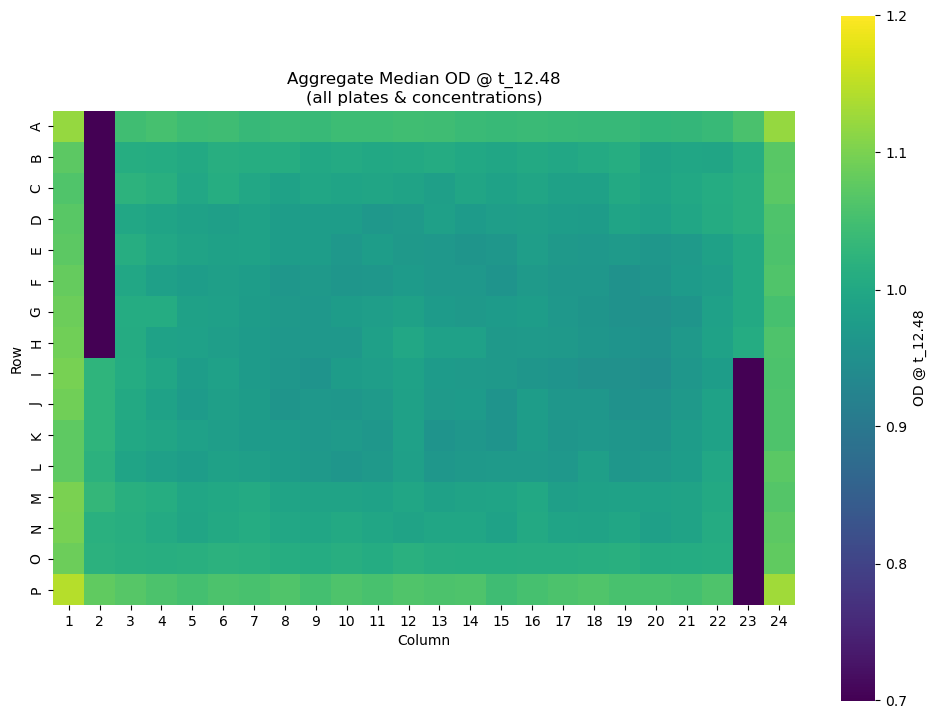

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_overall_median_heatmap(
    df,
    time_col='t_12.48',
    vmin=0.6,
    vmax=1.2,
    figsize=(8,12),
    save_path=None
):
    df_valid = df.dropna(subset=[time_col, 'Well'])
    med = (
        df_valid
        .groupby('Well')[time_col]
        .median()
        .reset_index(name='OD_median')
    )
    med['Row'] = med['Well'].str[0]
    med['Col'] = med['Well'].str[1:].astype(int)
    heatmap_data = med.pivot(index='Row', columns='Col', values='OD_median')

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        heatmap_data,
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        square=True,
        cbar_kws={
            'label': f'OD @ {time_col}',
            'shrink': 0.5
        }
    )
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    ax.set_title(f'Aggregate Median OD @ {time_col}\n(all plates & concentrations)')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    plt.show()

plot_overall_median_heatmap(
    df_concat,
    time_col='t_12.48',
    vmin=0.7,
    vmax=1.2,
    figsize=(10,14),
    save_path='/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/Overall_heatmap.png'
)

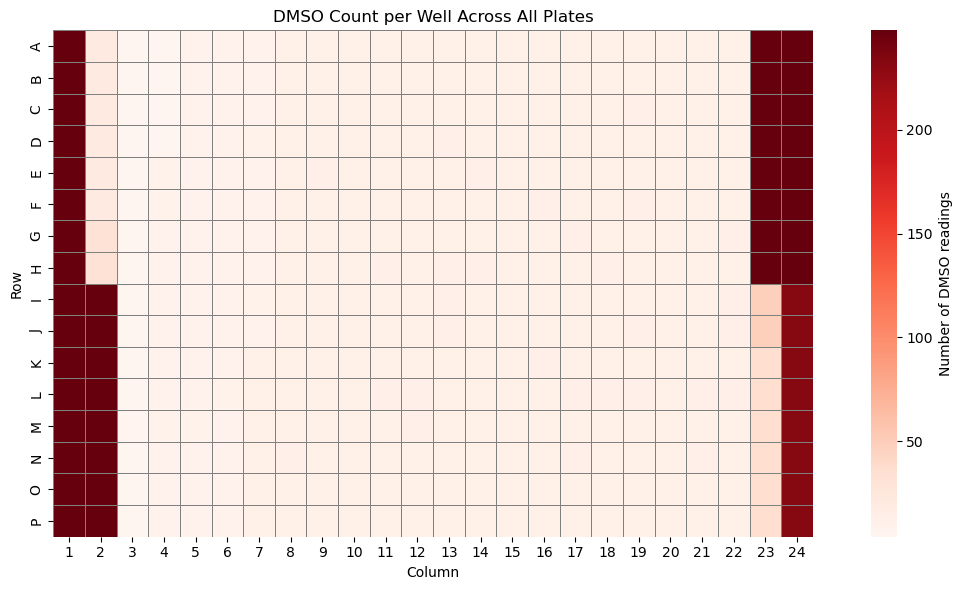

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. filter to valid rows & count DMSO per well
df_valid = df_concat.dropna(subset=['t_12.48', 'Well'])
dmso_counts = (
    df_valid[df_valid['Compound']=='DMSO']
    .groupby('Well')
    .size()
    .reset_index(name='count')
)

# 2. parse row/col and pivot into plate layout
dmso_counts['Row'] = dmso_counts['Well'].str[0]
dmso_counts['Col'] = dmso_counts['Well'].str[1:].astype(int)
heatmap_data = dmso_counts.pivot(index='Row', columns='Col', values='count')

# (optional) ensure full 16×24 grid, even if some wells never saw DMSO
all_rows = list("ABCDEFGHIJKLMNOP")
all_cols = list(range(1,25))
heatmap_data = heatmap_data.reindex(index=all_rows, columns=all_cols, fill_value=0)

# 3. plot
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    heatmap_data,
    cmap='Reds',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={'label': 'Number of DMSO readings'}
)
ax.set_xlabel("Column")
ax.set_ylabel("Row")
ax.set_title("DMSO Count per Well Across All Plates")
plt.tight_layout()
plt.savefig('/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/DMSO_heatmap.png')



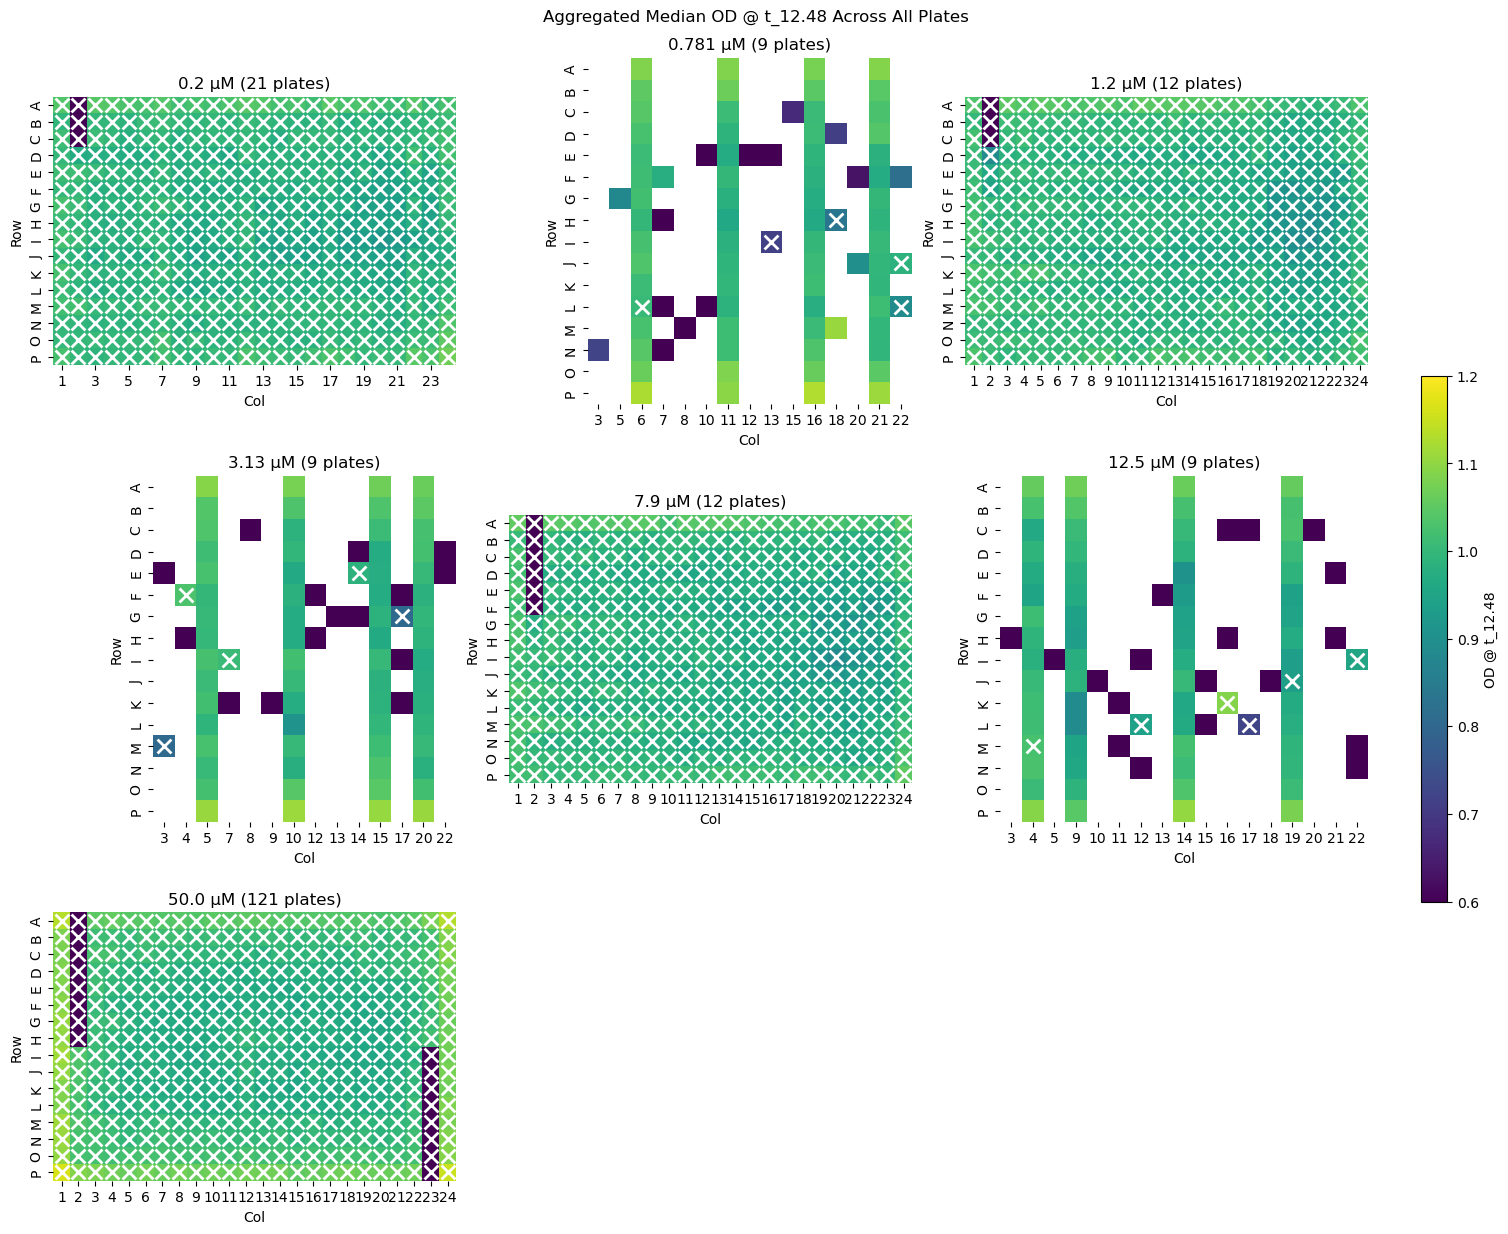

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_aggregated_heatmaps_at_12h(
    df,
    time_col='t_12.48',
    vmin=0.6, vmax=1.2,
    max_cols=3
):
    concs = sorted(df['Concentration'].dropna().unique())
    n = len(concs)
    ncols = min(max_cols, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(5 * ncols, 4 * nrows),
        constrained_layout=True
    )
    axes = np.atleast_1d(axes).flatten()

    for ax, conc in zip(axes, concs):
        sub = df[df['Concentration'] == conc]

        # ← only DMSO wells in this concentration
        dmso_wells_sub = sub.loc[sub['Compound']=='DMSO','Well'].unique()

        # median OD per well
        med = (
            sub
            .groupby('Well')[time_col]
            .median()
            .reset_index(name='OD_12h')
        )
        med['Row'] = med['Well'].str[0]
        med['Col'] = med['Well'].str[1:].astype(int)
        heatmap_data = med.pivot('Row', 'Col', 'OD_12h')

        # draw heatmap
        sns.heatmap(
            heatmap_data,
            ax=ax,
            cmap='viridis',
            vmin=vmin,
            vmax=vmax,
            cbar=False,
            square=True
        )

        # overlay only those DMSO wells
        rows = heatmap_data.index.tolist()
        cols = heatmap_data.columns.tolist()
        for well in dmso_wells_sub:
            r, c = well[0], int(well[1:])
            if r in rows and c in cols:
                y = rows.index(r)
                x = cols.index(c)
                ax.scatter(x+0.5, y+0.5,
                           marker='x', s=100,
                           color='white', linewidths=2)

        num_plates = sub['Plate_ID'].nunique()
        ax.set_title(f'{conc} µM ({num_plates} plates)')
        ax.set_xlabel('Col')
        ax.set_ylabel('Row')

    for ax in axes[len(concs):]:
        ax.axis('off')

    mappable = axes[0].collections[0]
    fig.colorbar(
        mappable,
        ax=axes.tolist(),
        orientation='vertical',
        fraction=0.02,
        pad=0.04,
        label=f'OD @ {time_col}'
    )

    plt.suptitle(f'Aggregated Median OD @ {time_col} Across All Plates', y=1.02)
    plt.savefig("/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/Heatmap_OD_medians.png")
    plt.show()


plot_aggregated_heatmaps_at_12h(df_concat)

In [193]:
df_GrowthCurve_allData['Plate_ID'].unique()

array(['546', '547', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07',
       'S08', 'S09', 'S10'], dtype=object)

In [197]:

for plate in df_GrowthCurve_allData['Plate_ID'].unique():
    print(f"Plate {plate} has {len(df_concat[(df_concat['Compound'] == 'DMSO') & (df_concat['Concentration'] == 1.2) & (df_concat['Plate_ID'] == plate)].Well.unique())} DMSO wells")

#df_concat[(df_concat['Compound'] == 'DMSO') & (df_concat['Concentration'] == 1.2) & (df_concat['Plate_ID'] == 'S01')].Well.unique()
#len(sub.loc[sub['Compound']=='DMSO'].Well.unique())



Plate 546 has 64 DMSO wells
Plate 547 has 64 DMSO wells
Plate S01 has 48 DMSO wells
Plate S02 has 48 DMSO wells
Plate S03 has 48 DMSO wells
Plate S04 has 48 DMSO wells
Plate S05 has 52 DMSO wells
Plate S06 has 52 DMSO wells
Plate S07 has 52 DMSO wells
Plate S08 has 310 DMSO wells
Plate S09 has 364 DMSO wells
Plate S10 has 384 DMSO wells


In the AllGrowthCurve data 

In [203]:
df_concat[(df_concat['Compound'] == 'DMSO') & (df_concat['Plate_ID'] == '547')].Well.unique()

array(['A01', 'A02', 'A23', 'A24', 'B01', 'B02', 'B23', 'B24', 'C01',
       'C02', 'C23', 'C24', 'D01', 'D02', 'D23', 'D24', 'E01', 'E02',
       'E23', 'E24', 'F01', 'F02', 'F23', 'F24', 'G01', 'G02', 'G23',
       'G24', 'H01', 'H02', 'H23', 'H24', 'I01', 'I02', 'I23', 'I24',
       'J01', 'J02', 'J23', 'J24', 'K01', 'K02', 'K23', 'K24', 'L01',
       'L02', 'L23', 'L24', 'M01', 'M02', 'M23', 'M24', 'N01', 'N02',
       'N23', 'N24', 'O01', 'O02', 'O23', 'O24', 'P01', 'P02', 'P23',
       'P24'], dtype=object)

In [204]:
df_concat[(df_concat['Compound'] == 'DMSO') & (df_concat['Plate_ID'] == 'S02')].Well.unique()

array(['A01', 'A23', 'A24', 'B01', 'B23', 'B24', 'C01', 'C23', 'C24',
       'D01', 'D23', 'D24', 'E01', 'E23', 'E24', 'F01', 'F23', 'F24',
       'G01', 'G23', 'G24', 'H01', 'H23', 'H24', 'I01', 'I02', 'I23',
       'J01', 'J02', 'J23', 'K01', 'K02', 'K23', 'L01', 'L02', 'L23',
       'M01', 'M02', 'M23', 'N01', 'N02', 'N23', 'O01', 'O02', 'O23',
       'P01', 'P02', 'P23'], dtype=object)

In [211]:
df_GrowthCurve_allData

,row,column,Well,Plate,Concentration,ProductName,t_0,t_2.08,t_4.16,t_6.24,...,statAcc,stat,maxR,maxR.t,minR,minR.t,Function,Structure_class_1,Structure_class_2,Target.1
0,A,1,A01,546,0.2,DMSO,0.0,0.281996,0.570499,0.763557,...,-0.021055,5.100000,0.140157,1.600000,0.036438,11.400000,NaN,NaN,NaN,NaN
1,A,2,A02,546,0.2,DMSO,0.0,0.288503,0.613883,0.778742,...,-0.025480,4.833333,0.148100,1.766667,0.039487,10.633333,NaN,NaN,NaN,NaN
2,A,3,A03,546,0.2,Polyoxyethylene stearate,0.0,0.286334,0.587852,0.765727,...,-0.020840,4.833333,0.143020,1.500000,0.023433,12.466667,Membrane,Surfactant,NaN,Membrane damage
3,A,4,A04,546,0.2,Lefamulin (acetate),0.0,0.262473,0.559653,0.737527,...,-0.019897,4.966667,0.135268,1.966667,0.023011,12.466667,Ribosome,Pleuromutilin,NaN,NaN
4,A,5,A05,546,0.2,Cefodizime (sodium),0.0,0.275488,0.924078,0.676790,...,-0.083934,4.400000,0.198472,1.966667,-0.089826,6.366667,Cell Wall,?-lactam,Cephalosporin,PBPs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18427,P,20,P20,S10,7.9,DMSO,0.0,0.187970,0.511278,0.736842,...,-0.027027,6.266667,0.143423,3.366667,0.027836,10.633333,NaN,NaN,NaN,NaN
18428,P,21,P21,S10,7.9,DMSO,0.0,0.185464,0.491228,0.736842,...,-0.026673,6.366667,0.141570,3.533333,0.027994,10.766667,NaN,NaN,NaN,NaN
18429,P,22,P22,S10,7.9,DMSO,0.0,0.187970,0.506266,0.741855,...,-0.026516,6.333333,0.143265,3.433333,0.029332,10.633333,NaN,NaN,NaN,NaN
18430,P,23,P23,S10,7.9,DMSO,0.0,0.197995,0.523810,0.761905,...,-0.029703,6.300000,0.147245,3.366667,0.023892,10.266667,NaN,NaN,NaN,NaN


In [213]:
df_concat[(df_concat['Compound'] == 'DMSO') & (df_concat['Plate_ID'] == 'S07')].Well.unique()

array(['A01', 'A23', 'A24', 'B01', 'B23', 'B24', 'C01', 'C23', 'C24',
       'D01', 'D23', 'D24', 'E01', 'E23', 'E24', 'F01', 'F23', 'F24',
       'G01', 'G02', 'G23', 'G24', 'H01', 'H02', 'H23', 'H24', 'I01',
       'I02', 'I23', 'I24', 'J01', 'J02', 'J23', 'J24', 'K01', 'K02',
       'K24', 'L01', 'L02', 'L24', 'M01', 'M02', 'M24', 'N01', 'N02',
       'N24', 'O01', 'O02', 'O24', 'P01', 'P02', 'P24'], dtype=object)

In [218]:
df_concat[(df_concat['Compound'] == 'DMSO') & (df_concat['Plate_ID'] == 'S08') & (df_concat['Concentration'] == 50)].Well.unique()

array(['A01', 'A02', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14',
       'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23',
       'A24', 'B01', 'B02', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13',
       'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22',
       'B23', 'B24', 'C01', 'C02', 'C08', 'C09', 'C10', 'C11', 'C12',
       'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'D01', 'D02', 'D08', 'D09', 'D10', 'D11',
       'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20',
       'D21', 'D22', 'D23', 'D24', 'E01', 'E02', 'E08', 'E09', 'E10',
       'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E20', 'E21', 'E22', 'E23', 'E24', 'F01', 'F02', 'F08', 'F09',
       'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',
       'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'G01', 'G02', 'G08',
       'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17',
       'G18', 'G19',

In [224]:
df_concat[(df_concat['Concentration'] == 0.2) & (df_concat['Plate_ID'] == '111-DR1')].Well.unique()

array(['A07', 'A12', 'A17', 'A22', 'B07', 'B12', 'B17', 'B22', 'C07',
       'C12', 'C17', 'C22', 'D07', 'D12', 'D17', 'D22', 'E07', 'E12',
       'E17', 'E22', 'F07', 'F12', 'F17', 'F22', 'G07', 'G12', 'G17',
       'G22', 'H07', 'H12', 'H17', 'H22', 'I07', 'I12', 'I17', 'I22',
       'J07', 'J12', 'J17', 'J22', 'K07', 'K12', 'K17', 'K22', 'L07',
       'L12', 'L17', 'L22', 'M07', 'M12', 'M17', 'M22', 'N07', 'N12',
       'N17', 'N22', 'O07', 'O12', 'O17', 'O22', 'P07', 'P12', 'P17',
       'P22'], dtype=object)

In [220]:
df_concat[(df_concat['Compound'] == 'DMSO') & (df_concat['Concentration'] == 0.2)].Well.unique()

array(['A01', 'A02', 'A23', 'A24', 'B01', 'B02', 'B23', 'B24', 'C01',
       'C02', 'C23', 'C24', 'D01', 'D02', 'D23', 'D24', 'E01', 'E02',
       'E23', 'E24', 'F01', 'F02', 'F23', 'F24', 'G01', 'G02', 'G23',
       'G24', 'H01', 'H02', 'H23', 'H24', 'I01', 'I02', 'I23', 'I24',
       'J01', 'J02', 'J23', 'J24', 'K01', 'K02', 'K23', 'K24', 'L01',
       'L02', 'L23', 'L24', 'M01', 'M02', 'M23', 'M24', 'N01', 'N02',
       'N23', 'N24', 'O01', 'O02', 'O23', 'O24', 'P01', 'P02', 'P23',
       'P24', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15',
       'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'B08', 'B09',
       'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18',
       'B19', 'B20', 'B21', 'B22', 'C08', 'C09', 'C10', 'C11', 'C12',
       'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15',
       'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'E08', 'E09',
       'E10', 'E11',

# Median Plate OD values

# Plots

In [11]:
len(df_concat['Plate_ID'].unique())

122

In [14]:
df_concat.columns

Index(['Well', 'Plate_ID', 'Concentration', 'Compound', 'Replicate', 't_0',
       't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48', 'Smiles'],
      dtype='object')

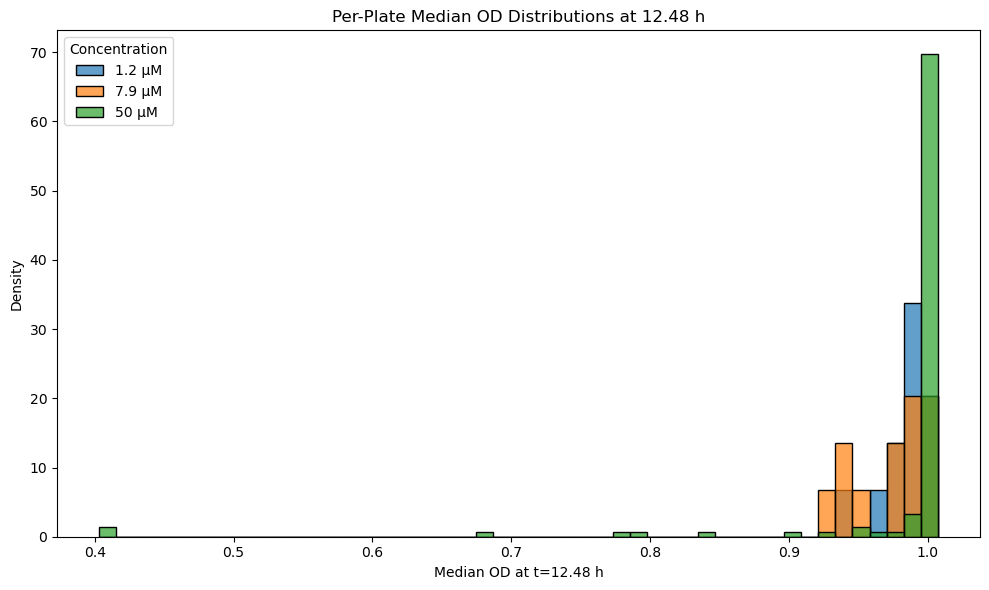

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. select only the three concentrations we care about
concs = [1.2, 7.9, 50]
df_sub = df_concat[df_concat['Concentration'].isin(concs)]

# 2. compute median OD at t_12.48 for each plate & concentration
plate_meds = (
    df_sub
    .groupby(['Concentration', 'Plate_ID'])['t_12.48']
    .median()
    .reset_index(name='median_OD')
)

# 3. build a color palette
palette = dict(zip(concs, sns.color_palette("tab10", n_colors=len(concs))))

# 4. compute shared bins based on the full range of median_OD
min_od = plate_meds['median_OD'].min()
max_od = plate_meds['median_OD'].max()
bins = np.linspace(min_od, max_od, 50)  # 30 evenly spaced bins

# 5. plot
plt.figure(figsize=(10, 6))
for c in concs:
    sns.histplot(
        data=plate_meds[plate_meds['Concentration'] == c],
        x='median_OD',
        label=f'{c} µM',
        stat='density',
        bins=bins,            # ← same edges for every conc
        alpha=0.7,
        color=palette[c],
        element='bars',
        fill=True,
        common_norm=False     # keep densities separate
    )

plt.xlabel("Median OD at t=12.48 h")
plt.ylabel("Density")
plt.title("Per-Plate Median OD Distributions at 12.48 h")
plt.legend(title="Concentration")
plt.tight_layout()
plt.savefig('/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/Plate_median_value_hist.png')
plt.show()


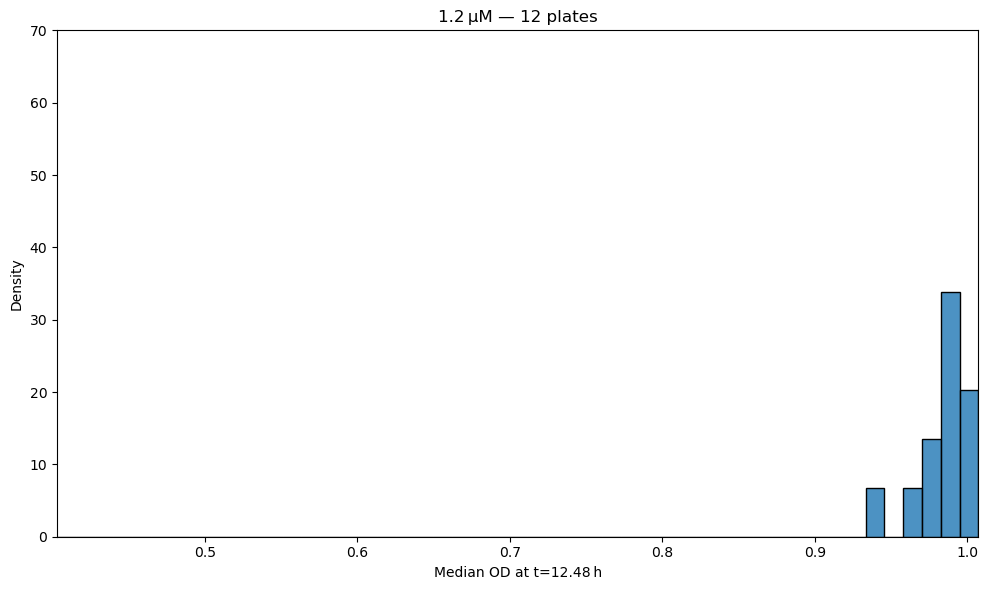

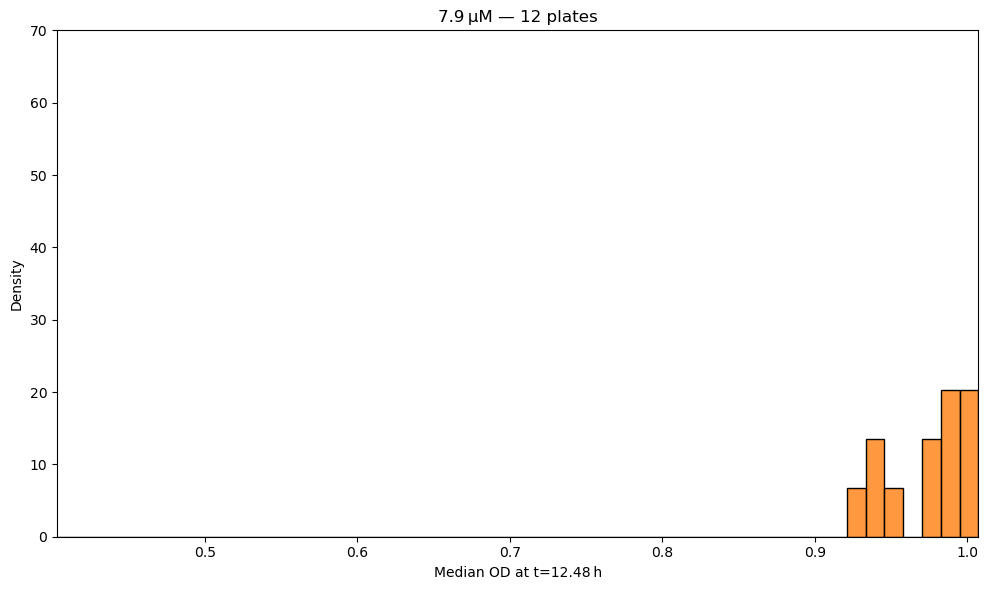

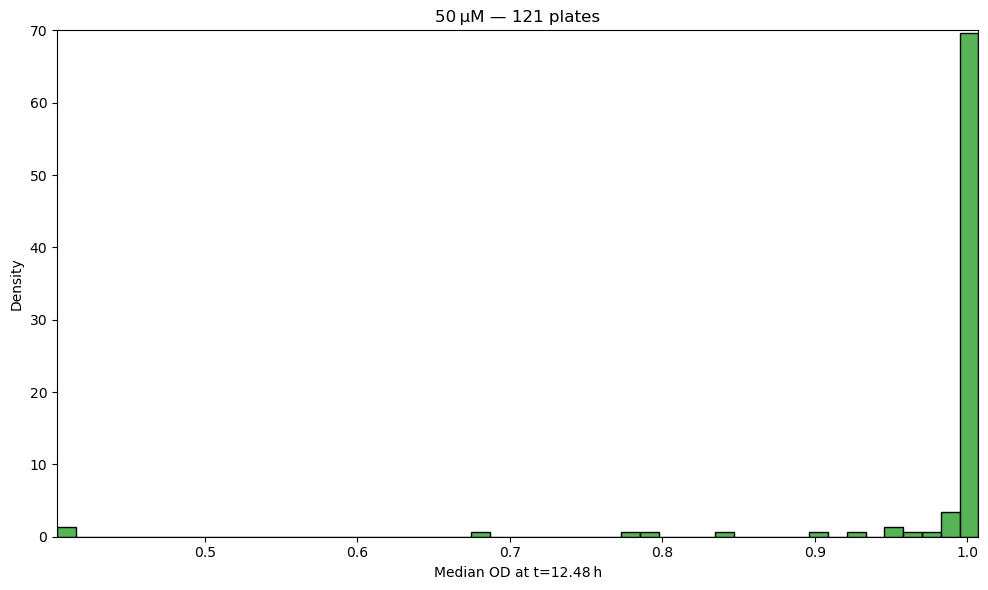

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. concentrations and subset
concs = [1.2, 7.9, 50]
df_sub = df_concat[df_concat['Concentration'].isin(concs)]

# 2. compute per‐plate medians
plate_meds = (
    df_sub
    .groupby(['Concentration', 'Plate_ID'])['t_12.48']
    .median()
    .reset_index(name='median_OD')
)

# 3. shared bins over the full range
min_od = plate_meds['median_OD'].min()
max_od = plate_meds['median_OD'].max()
bins = np.linspace(min_od, max_od, 50)

# 4. color map for each
palette = dict(zip(concs, sns.color_palette("tab10", n_colors=len(concs))))

for c in concs:
    data = plate_meds[plate_meds['Concentration'] == c]['median_OD']

    fig, ax = plt.subplots(figsize=(10,6))
    sns.histplot(
        data=data,
        bins=bins,
        stat='density',
        color=palette[c],
        edgecolor='black',
        linewidth=1,
        alpha=0.8,
        ax=ax
    )
    ax.set_xlabel("Median OD at t=12.48 h")
    ax.set_ylabel("Density")
    ax.set_title(f"{c} µM — {len(data)} plates")
    ax.set_xlim(min_od, max_od)   # same x‐axis range
    ax.set_ylim(0, 70)            # <-- fixed y‐axis max at 70

    plt.tight_layout()
    plt.savefig(f"/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/Plate_median_hist_{c}uM.png")
    plt.show()
